In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [198]:
cd E:\PYTHON PROJECTS\\FIRST_AUST_WFIRE

E:\PYTHON PROJECTS\FIRST_AUST_WFIRE


In [199]:
table = pd.read_csv("fire_archive_M6_96619.csv")

In [200]:
table

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,8/1/2019,56,Terra,MODIS,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,8/1/2019,56,Terra,MODIS,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,8/1/2019,57,Terra,MODIS,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,8/1/2019,57,Terra,MODIS,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,8/1/2019,57,Terra,MODIS,36,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,9/30/2019,1644,Aqua,MODIS,85,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,9/30/2019,1644,Aqua,MODIS,27,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,9/30/2019,1644,Aqua,MODIS,43,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,9/30/2019,1644,Aqua,MODIS,41,290.3,5.7,N,0


In [201]:
print('Latitude and longitude show the coordinates of the fire.')
table.brightness

Latitude and longitude show the coordinates of the fire.


0        313.0
1        319.3
2        311.6
3        310.1
4        310.3
         ...  
36006    312.7
36007    304.9
36008    301.7
36009    303.6
36010    309.1
Name: brightness, Length: 36011, dtype: float64

In [202]:
lat = table['latitude'].values
lon = table['longitude'].values
brightness = table['brightness'].values
#area = table['track'].values
date = table['acq_date'].values

C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


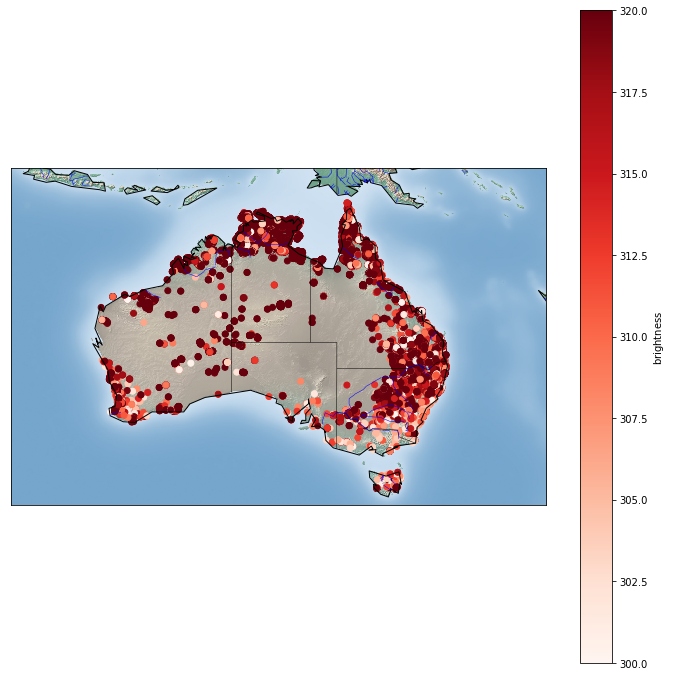

In [203]:
fig = plt.figure(figsize=(12,12))
m = Basemap(
            llcrnrlon=103.784763, llcrnrlat=-44.590467,
            urcrnrlon=164.90369, urcrnrlat=-6.105602) 
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')
m.drawrivers(color='blue')

m.scatter( x = lon, y = lat,
    c=(brightness),
          cmap='Reds', alpha=1)

plt.colorbar(label=r'${\rm brightness}$')
plt.clim(300, 320)


In [204]:
data = table['acq_date']

In [205]:
data_array = data.values

In [206]:
data_array

array(['8/1/2019', '8/1/2019', '8/1/2019', ..., '9/30/2019', '9/30/2019',
       '9/30/2019'], dtype=object)

In [207]:
i = 0
mounth_8 = [0]*32
mounth_9 = [0]*31
day = 1;
mounth = 8
for i in data_array :
    if i == '8/'+ str(day) + '/2019':
        mounth_8[day] = mounth_8[day] + 1
    else:
        day = day + 1 
        if day == 32:
            break
        mounth_8[day] = mounth_8[day] + 1

data_m9 = data.tail(len(data) - sum(mounth_8)).values

day = 1
for i in data_m9 :
    if i == '9/' + str(day) +'/2019':
        mounth_9[day] = mounth_9[day] + 1
    else:
        day = day + 1
        if day == 31:
            break
        mounth_9[day] = mounth_9[day] + 1
sum(mounth_8)+sum(mounth_9)

36011

In [220]:
a = 0
for i in range(1,4) :
    a = mounth_8[i] + a
a = a - 1
print(a)
len(table)

1652


36011

In [221]:
week_august = table.head(1652)
table = table.tail(len(table)-a)
lat = week_august['latitude'].values
lon = week_august['longitude'].values
brightness = week_august['brightness'].values

C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


Text(0.5, 1.0, '2019 August 1-3')

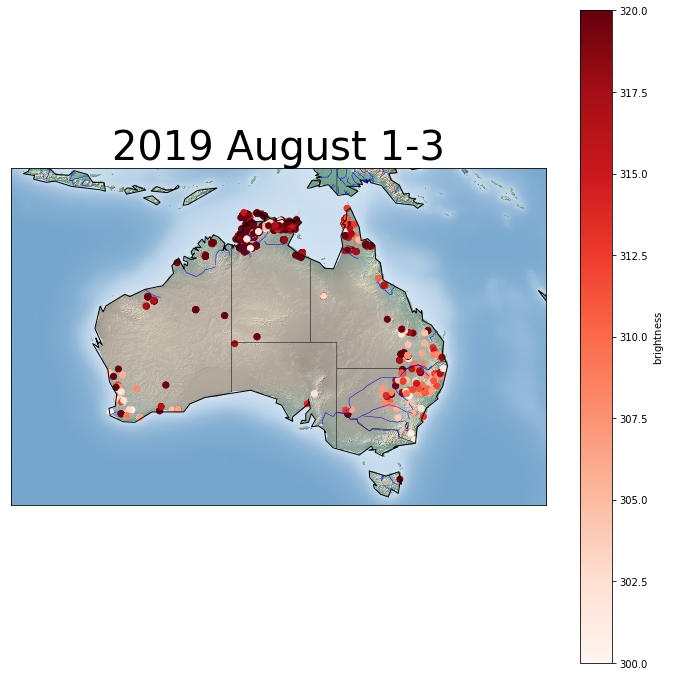

In [217]:
fig = plt.figure(figsize=(12,12))
m = Basemap(
            llcrnrlon=103.784763, llcrnrlat=-44.590467,
            urcrnrlon=164.90369, urcrnrlat=-6.105602) 
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')
m.drawrivers(color='blue')

m.scatter( x = lon, y = lat,
    c=(brightness),
          cmap='Reds', alpha=1)

plt.colorbar(label=r'${\rm brightness}$')
plt.clim(300, 320)
plt.title('2019 August 1-3', fontsize = 40, color = 'Black')

In [223]:
a = 0
for i in range (4,12) :
    a = a + mounth_8[i]

34359

In [226]:
week_august = table.head(a)
table = table.tail(len(table)-a)
lat = week_august['latitude'].values
lon = week_august['longitude'].values
brightness = week_august['brightness'].values

C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\zolik\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


Text(0.5, 1.0, '2019 August 4-11')

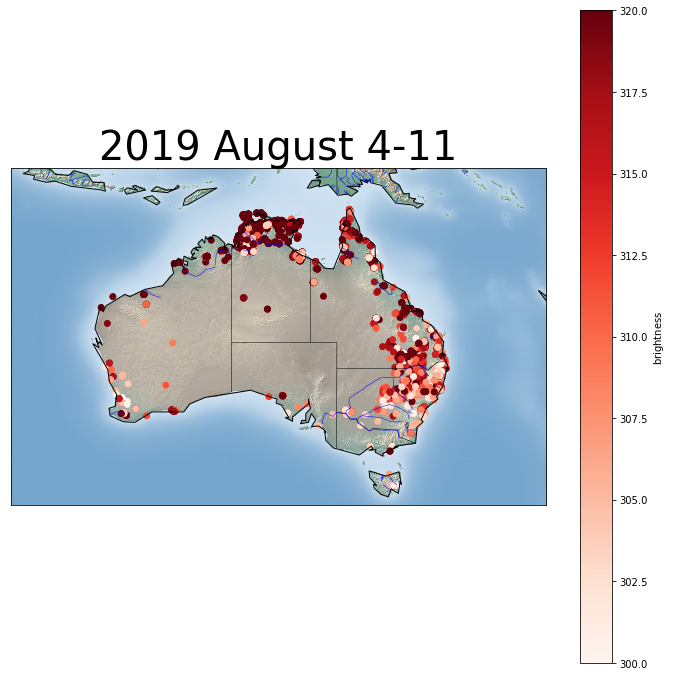

In [228]:
fig = plt.figure(figsize=(12,12))
m = Basemap(
            llcrnrlon=103.784763, llcrnrlat=-44.590467,
            urcrnrlon=164.90369, urcrnrlat=-6.105602) 
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')
m.drawrivers(color='blue')

m.scatter( x = lon, y = lat,
    c=(brightness),
          cmap='Reds', alpha=1)

plt.colorbar(label=r'${\rm brightness}$')
plt.clim(300, 320)
plt.title('2019 August 4-11', fontsize = 40, color = 'Black')

In [230]:
table['acq_time']

10410     127
10411     127
10412     127
10413     127
10414     128
         ... 
36006    1644
36007    1644
36008    1644
36009    1644
36010    1645
Name: acq_time, Length: 25601, dtype: int64